# Regresion Logistica para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/bank/bank.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
columns_names = data.columns.values.tolist()
columns_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [4]:
data['y'] = (data['y']=='yes').astype(int)

In [5]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [6]:
data['education'] = np.where(data['education']=='basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education']=='basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education']=='basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education']=='high.school', 'High School', data['education'])
data['education'] = np.where(data['education']=='professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education']=='university.degree', 'University Degree', data['education'])
data['education'] = np.where(data['education']=='unknown', 'Unknown', data['education'])
data['education'] = np.where(data['education']=='illiterate', 'Illiterate', data['education'])

In [7]:
data['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [8]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [9]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [10]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


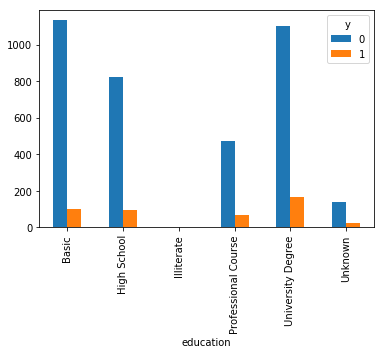

In [11]:
%matplotlib inline
pd.crosstab(data['education'], data['y']).plot(kind='bar')

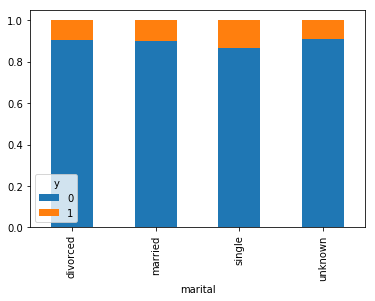

In [12]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

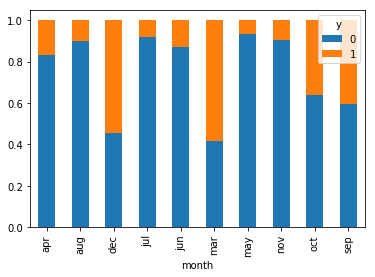

In [13]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

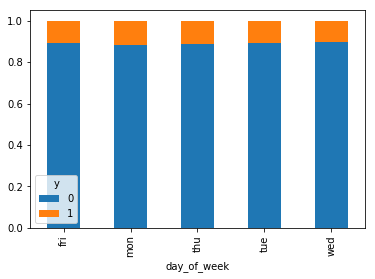

In [14]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

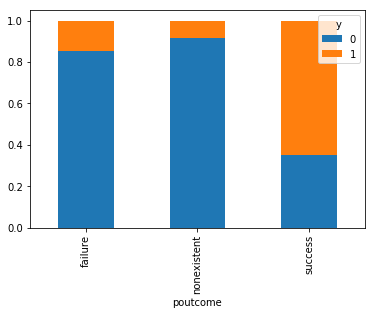

In [15]:
table = pd.crosstab(data.poutcome, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## Conversion de las variables categoricas a dummies

In [16]:
categories = ['job', 'marital', 'education','contact', 'default', 'housing', 'loan', 'day_of_week', 'month', 'poutcome']
categories

['job',
 'marital',
 'education',
 'contact',
 'default',
 'housing',
 'loan',
 'day_of_week',
 'month',
 'poutcome']

In [17]:
for category in categories:
    cat_list = 'cat' + '_' + category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_list)
    data = data.join(cat_dummies)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cat_month_jul,cat_month_jun,cat_month_mar,cat_month_may,cat_month_nov,cat_month_oct,cat_month_sep,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,0,1,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,0,1,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,1,0,0,0,0,0,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,1,0,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,0,1,0,0,0,1,0


In [18]:
data_vars = data.columns.values.tolist()

In [19]:
to_keep = [v for v in data_vars if v not in categories]

In [20]:
bank_data =  data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_default_no',
       'cat_default_unknown', 'cat_default_yes', 'cat_housing_no',
       'cat_housing_unknown', 'cat_housing_yes', 'cat_loan_no',
       'cat_loan_unknown', 'cat_loan_yes', 'cat_day_of_week

In [21]:
bank_data_var = bank_data.columns.values.tolist()
y = ['y']
x = [v for v in bank_data_var if v not in y]

## Seleccion de los rasgos para los modelos

In [22]:
n = 12

In [23]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[x], bank_data[y].values.ravel())

/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [25]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True])

In [26]:
rfe.ranking_

array([36, 42, 18, 44,  1, 14, 27, 25,  1, 41, 22,  3,  1, 38,  2, 40,  1,
        5, 30, 34, 12, 47, 19, 33, 31, 50, 26, 13, 48, 21, 32,  8, 16,  4,
       37, 35, 49, 20,  9, 10, 15,  6, 23, 39, 28, 43, 29, 11, 45, 24,  1,
        1,  1,  1,  1, 17,  1, 46,  1,  7,  1])

In [27]:
z = list(zip(bank_data_var, rfe.support_, rfe.ranking_))

In [28]:
z

[('age', False, 36),
 ('duration', False, 42),
 ('campaign', False, 18),
 ('pdays', False, 44),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 41),
 ('y', False, 22),
 ('cat_job_admin.', False, 3),
 ('cat_job_blue-collar', True, 1),
 ('cat_job_entrepreneur', False, 38),
 ('cat_job_housemaid', False, 2),
 ('cat_job_management', False, 40),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 5),
 ('cat_job_services', False, 30),
 ('cat_job_student', False, 34),
 ('cat_job_technician', False, 12),
 ('cat_job_unemployed', False, 47),
 ('cat_job_unknown', False, 19),
 ('cat_marital_divorced', False, 33),
 ('cat_marital_married', False, 31),
 ('cat_marital_single', False, 50),
 ('cat_marital_unknown', False, 26),
 ('cat_education_Basic', False, 13),
 ('cat_education_High School', False, 48),
 ('cat_education_Illiterate', False, 21),
 ('cat_education_Professional

In [29]:
def columnsSelector(lista_name_value):
    n = range(np.shape(lista_name_value)[0])
    columns_names = []
    for i in n:
        if lista_name_value[i][1]:
            columns_names.append(lista_name_value[i][0])
    return columns_names

In [30]:
columns_names = columnsSelector(z)
columns_names

['previous',
 'euribor3m',
 'cat_job_blue-collar',
 'cat_job_retired',
 'cat_month_aug',
 'cat_month_dec',
 'cat_month_jul',
 'cat_month_jun',
 'cat_month_mar',
 'cat_month_nov',
 'cat_month_sep',
 'cat_poutcome_nonexistent']

In [31]:
X = bank_data[columns_names]
Y = bank_data['y']

## Implementacion del modelo en Python
### Utilizando *statsmodel.api*

In [32]:
import statsmodels.api as sm

In [33]:
logit_model = sm.Logit(Y, X)

In [34]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291069
         Iterations 7


In [35]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.157     
Dependent Variable:     y                  AIC:                2421.8237 
Date:                   2019-04-30 11:45   BIC:                2497.7041 
No. Observations:       4119               Log-Likelihood:     -1198.9   
Df Model:               11                 LL-Null:            -1422.9   
Df Residuals:           4107               LLR p-value:        3.8013e-89
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
previous                 -0.1853   0.0734  -2.5239 0.0116 -0.3291 -0.0414
euribor3m                -0.6018   0.0384 -15.6576 0.0000 -0.6771 -0.5264
cat_job_blue-collar      -0.4761   0.1522  -3.1271 0.0018 -0.7745 -0.1777
cat_job_retired           0.2103   0.2198   0.9567 0.3387 -0.2205  0.6410
cat_month_aug             0.6655   0.1780   3.7385 0.0002  0.3166  1.0144
cat_month_dec             1.1902   0.4493   2.6489 0.0081  0.3096  2.0708
cat_month_jul             1.0780   0.1923   5.6063 0.0000  0.7011  1.4548
cat_month_jun             1.1299   0.1769   6.3886 0.0000  0.7833  1.4766
cat_month_mar             1.7182   0.3147   5.4590 0.0000  1.1013  2.3351
cat_month_nov             0.4343   0.1962   2.2134 0.0269  0.0497  0.8190
cat_month_sep             0.6931   0.2772   2.5003 0.0124  0.1498  1.2363
cat_poutcome_nonexistent -0.8468   0.1240  -6.8269 0.0000 -1.0899 -0.6037
=========================================================================

"""

### Utilizando scikit-learn

In [36]:
from sklearn import linear_model
from IPython.display import display, Math, Latex

In [37]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y)

/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
logit_model.score(X, Y)

0.8968196164117505

In [39]:
1- Y.mean()

0.8905074047098811

In [40]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.45932903636003597]
1,euribor3m,[-0.5420220429641021]
2,cat_job_blue-collar,[-0.32712248324620624]
3,cat_job_retired,[0.3466851627307548]
4,cat_month_aug,[0.6839567146410532]
5,cat_month_dec,[1.243658851495822]
6,cat_month_jul,[1.0074672402118576]
7,cat_month_jun,[1.1029797533729995]
8,cat_month_mar,[1.688531898328155]
9,cat_month_nov,[0.5071113353189479]


## Validación de datos

In [41]:
from sklearn.model_selection import train_test_split 

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [43]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
probs = lm.predict_proba(X_test)

In [45]:
display(Math(r'Y_p =\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [46]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.15
prob_df['Prediccion'] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,Prediccion
0,0.047199,0
1,0.154126,1
2,0.068034,0
3,0.062380,0
4,0.043230,0


In [47]:
from sklearn import metrics

In [48]:
metrics.accuracy_score(Y_test, prob_df['Prediccion'])

0.7823624595469255

## Validación cruzada

### K-fold cross validation

In [49]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [50]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=10)

/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [51]:
scores

array([0.9031477 , 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.88834951, 0.88349515, 0.89563107, 0.89537713, 0.88807786])

In [52]:
scores.mean()

0.8943884240990478

## Curvas ROC

In [54]:
X_train, X_test, Y_tran, Y_test = train_test_split(X, Y, test_size =0.3, random_state=0)

In [55]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
probs = lm.predict_proba(X_test)

In [63]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['Prediction'] = np.where(prob_df[0]>= threshold, 1, 0)
prob_df['Actual'] = list(Y_test)
prob_df.head()

,0,Prediction,Actual
0,0.047199,0,0
1,0.154126,1,0
2,0.068034,0,0
3,0.062380,0,0
4,0.043230,0,0


In [65]:
confusion_matrix = pd.crosstab(prob_df.Prediction,prob_df.Actual)
confusion_matrix

Actual,0,1
Prediction,,
0,806,40
1,308,82


In [66]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

In [67]:
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
sensibilidad, especificidad

(0.21025641025641026, 0.9527186761229315)

In [69]:
espc_1 = 1 - especificidad
espc_1

0.047281323877068515

In [81]:
threshold = [0.04, 0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.2, 0.25, 0.3, 0.5]
sensibilities = [1]
especifities_1 = [1]
for t in threshold:
    prob_df['Prediction'] = np.where(prob_df[0]>= t, 1, 0)
    prob_df['Actual'] = list(Y_test)
    confusion_matrix = pd.crosstab(prob_df.Prediction,prob_df.Actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    sensibilidad = TP / (TP + FN)
    especificidad = TN / (TN + FP)
    espc_1 = 1 - especificidad
    sensibilities.append(sensibilidad)
    especifities_1.append(espc_1)
sensibilities.append(0)
especifities_1.append(0)

In [82]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.2342908438061041,
 0.196588868940754,
 0.12208258527827653,
 0.08976660682226212,
 0.0763016157989228,
 0.07181328545780974,
 0.013464991023339312,
 0]

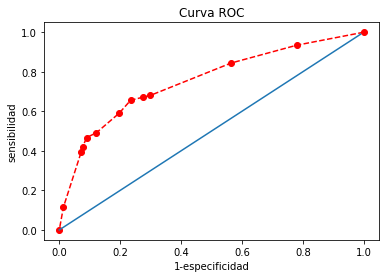

In [84]:
%matplotlib inline
plt.plot(especifities_1, sensibilities, marker='o', linestyle='--', color='red')
x = [i*0.01 for i in range(100)]
y = x
plt.plot(x,y)
plt.xlabel('1-especificidad')
plt.ylabel('sensibilidad')
plt.title('Curva ROC')
plt.savefig('Mi_primer_curva_ROC')

### Utilizando Scikit-learn

In [95]:
from sklearn import metrics

In [96]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

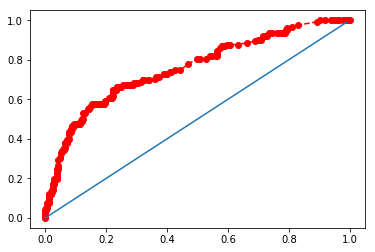

In [97]:
%matplotlib inline
plt.plot(espc_1, sensit, marker = 'o', linestyle='--', color='red')
x = [i*0.01 for i in range(100)]
plt.plot(x,x)

In [98]:
auc = metrics.auc(espc_1, sensit)
auc

0.7574646084115726